(sec:diskr_gv)=
# Diskrete Gleichverteilung

## Definition

Die diskrete Gleichverteilung wird verwendet wenn eine Zufallsvariable endlich viele Werte annehmen kann und alle mit gleicher Wahrscheinlichkeit auftreten. Das Standardbeispiel dafür ist der (faire) Würfel. 

:::{admonition} Definition
:class: definition

Es sei $M=\{x_1,\dots, x_n\}$ eine Menge aus $n\in\mathbb N$ Elementen. Ist $X$ eine Zufallsvariable mit 

$$\mathbb P(X= x_i) = \frac1n$$

so nennt man $X$ diskret gleichverteilt auf der Menge $M$. Man schreibt dann

$$X \sim U(M) \quad \text{oder} \quad X\sim U(\{x_1,\dots,x_n\})$$

:::

Im Falle des fairen Würfels ist $X\sim U(M)$ mit $M=\{1,2,3,4,5,6\}$.

## Anwendung

- Ein Unternehmen verlost unter seinen 50 Mitarbeitern einen Bonus. Jeder Mitarbeiter hat die gleiche Wahrscheinlichkeit von $\frac1{50}$ den Bonus zu erhalten.
- Bei einer Tombola mit 100 Losen hat jedes Los die gleiche Gewinnwahrscheinlichkeit von $\frac1{100}$.
- Ein Glücksrad mit 8 gleich großen Feldern hat für jedes Feld die Wahrscheinlichkeit $\frac18$.




## Eigenschaften

**Erwartungswert:**

$$\mathbb E(X) = \frac1n\sum_{i=1}^n x_i = \bar x$$

**Varianz:**

$$\mathrm{Var}(X) = \left(\frac1n \sum_{i=1}^n x_i^2\right) - \left(\frac1n \sum_{i=1}^n x_i \right)^2$$ 


**Stabdiagramm**

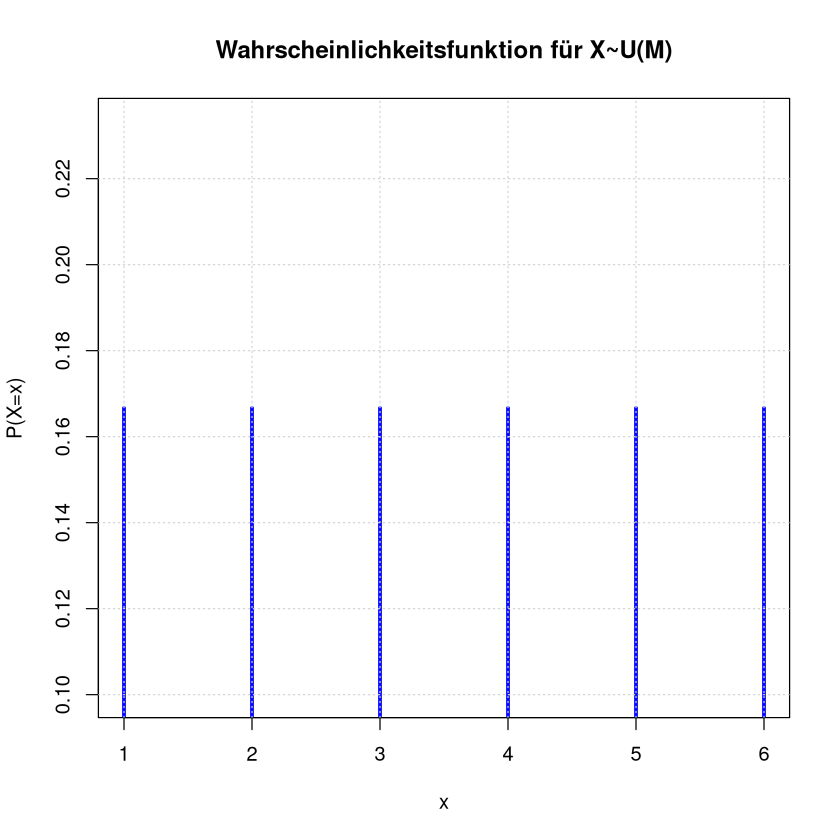

In [3]:
M     <- c(1,2,3,4,5,6)
n     <- length(M)
probs <- rep(1,n)/n

title <- paste("Wahrscheinlichkeitsfunktion für X~U(M)")
plot(x = M, y = probs, col = "blue", type = "h", lwd = 3,
     main = title, ylab = "P(X=x)", xlab = "x")
grid()

**Verteilungsfunktion**

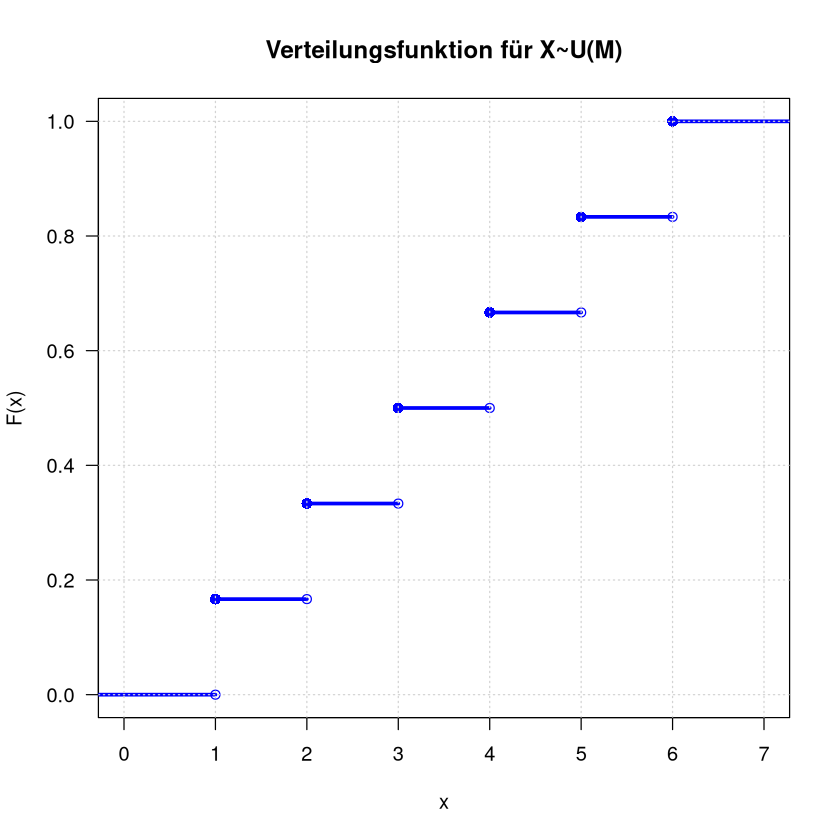

In [4]:
plot.dcdf <- function(x, prob , col="blue", lwd=3, ...) {
  y   <- c(0,cumsum(prob))
  cdf <- stepfun(x=x, y=y, right=TRUE)
  plot(cdf, verticals=FALSE,
       lwd=lwd, col=col, las=1, 
       xlab="x", ylab="F(x)", ...)
  points(x,cumsum(prob),pch = 16, col=col, cex=1.2)
}
title <- paste("Verteilungsfunktion für X~U(M)" )
plot.dcdf(M, probs, main=title)
grid()

## Beispiel

:::{admonition} Beispiel
:class: beispiel

Auf einem Glücksrad stehen die Zahlen 1 bis 20. Alle Felder haben die gleiche Größe. 
Die Zufallsvariable $X$ beschreibt das Ergebnis nach ein mal Drehen. Daher gilt

$$X\sim U(\{1,2,\dots, 20\})$$

1. Wie groß ist die Wahrscheinlichkeit, dass die 10 getroffen wird?

   **Antwort:** $\mathbb P(X=10) = \frac{1}{20}$
   
2. Wie groß ist die Wahscheinlichkeit, dass eine Zahl größer 15 getroffen wird?

   **Antwort:** 
   
   $$\begin{align*}\mathbb P(X>15) &= \mathbb P(X=16)+\mathbb P(X=17)+\mathbb P(X=18)+\mathbb P(X=19)+\mathbb P(X=20)\\ &= \frac{1}{20}+\frac{1}{20}+\frac{1}{20}+\frac{1}{20}+\frac{1}{20}\\&= \frac14\end{align*}$$
   
:::

## Umsetzung in R

Da die Berechnung der Wahrscheinlichkeiten für die diskrete Gleichverteilung sehr einfach ist, gibt es in Standard R keine Funktionen dafür. Will man Zufallszahlen gemäß der diskreten Gleichverteilung generieren, so kann man den Befehl `sample` nutzen. Dieser simuliert das Ziehen aus einer Menge. Das erste Argument ist dabei die Menge aus der man zieht. Das zweite Argument ist die Anzahl der Elemente die man zieht. Die Option `replace=TRUE` legt fest, dass Ziehen **mit** Zurücklegen simuliert werden soll.

Daher werden mit folgendem Befehl 4 Zufallszahlen gemäß der diskreten Gleichverteilung auf der Menge $\{1,2,3,4,5\}$ erzeugt. 

In [1]:
set.seed(439)       # Setzt den Startpunkt für die Erzeugung der Pseudozufallszahlen 
                    # Zahl kann beliebig gewählt werden. 
                    # Sorgt dafür, dass der "Zufall" immer die gleichen Ergebnisse liefert.
sample(c(1,2,3,4,5),4, replace = TRUE)

[1] 1 3 2 3

Will man auf die Funktionen für Wahrscheinlichkeitsfunktion und Verteilungsfunktion nicht verzichten, kann man das Paket `extraDistr` nutzen. Wird das geladen stehen die passenden Funktionen zur Verfügung

In [14]:
library(extraDistr)

# X~ U({1,2,3,4,5,6,7,8})
# ges. P(X=5)
ddunif(5,min = 1,max=8)
# ges. P(X<=5)
pdunif(5,min = 1,max=8)

[1] 0.125

[1] 0.625